In [3]:
import pandas as pd
import pickle
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter

import numpy as np
import spacy
from string import punctuation

In [12]:
df = pd.read_pickle('C:/Saravana/Data/Raw/export-cleansed-4851f054c66579780503d70880731802.pkl.bz2')
display(df.head())

,IMP_ID,GJ,IMPORT,MUFO_REFERENZ_N,BARCODE_NR,VERANST_SEGMENT,REKLA_JN,VG_DATUM_VON,VG_ORT,VG_RAUM,...,VERANST_ORT,NUTZLIZNEHM_GESCHAEFTSZEICHEN,NUTZLIZNEHM_NAME,NUTZLIZNEHM_VORNAME,NUTZLIZNEHM_STRASSE,NUTZLIZNEHM_PLZ,NUTZLIZNEHM_ORT,LOCATION,BAND,PROMOTER
ID,,,,,,,,,,,,,,,,,,,,,
9938765,24643,2016,ABRE U INKA 2016,NaN,5027961220,4.0,NONRekla,2014-02-09,LISBERG,TURNHALLE SV RW LISBERG,...,WALSDORF,1510423300,BAYERISCHER BLASMUSIKVERBAND,NaN,NaN,80084,MUENCHEN,LISBERG TURNHALLE SV RW LISBERG,NaN,AURACHTALER BLASMUSIKVEREIN WALSDORF E.V 96194
9938766,24643,2016,ABRE U INKA 2016,NaN,5027961235,6.0,NONRekla,2014-02-08,LISBERG,TURNHALLE SV RW LISBERG,...,WALSDORF,1510423300,BAYERISCHER BLASMUSIKVERBAND,NaN,NaN,80084,MUENCHEN,LISBERG TURNHALLE SV RW LISBERG,DAS BOEHMISCHE FEUER,AURACHTALER BLASMUSIKVEREIN WALSDORF E.V 96194
9938851,24643,2016,ABRE U INKA 2016,NaN,5044481411,3.0,NONRekla,2014-03-15,MUENCHEN,WERNER-VON-SIEMENS-SCHULZENTRUM,...,MUENCHEN,1510423300,BAYERISCHER BLASMUSIKVERBAND,NaN,NaN,80084,MUENCHEN,MUENCHEN WERNER-VON-SIEMENS-SCHULZENTRUM,NaN,BLASORCHESTER ST. MICHAEL MUENCHEN-PERLACH E.V...
9938852,24643,2016,ABRE U INKA 2016,NaN,5044481427,2.0,NONRekla,2014-03-14,MUENCHEN,PFARRHEIM UND KIRCHE,...,MUENCHEN,1510423300,BAYERISCHER BLASMUSIKVERBAND,NaN,NaN,80084,MUENCHEN,MUENCHEN PFARRHEIM UND KIRCHE,NaN,BLASORCHESTER ST. MICHAEL MUENCHEN-PERLACH E.V...
9938853,24643,2016,ABRE U INKA 2016,NaN,5044481469,2.0,NONRekla,2014-02-09,GRAFENRHEINFELD,KULTURHALLE GRAFENRHEINFELD,...,WERNECK,1510423300,BAYERISCHER BLASMUSIKVERBAND,NaN,NaN,80084,MUENCHEN,GRAFENRHEINFELD KULTURHALLE GRAFENRHEINFELD,NaN,MUSIKVEREIN WERNECK E.V 97440


In [13]:
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option('display.max_rows', None)

In [14]:
df.VERANST_SEGMENT.unique()

array([ 4.,  6.,  3.,  2.,  5.,  7.,  8., 10.,  9., 11., 12.])

In [15]:
df.VG_RAUM.unique()

['TURNHALLE SV RW LISBERG', 'WERNER-VON-SIEMENS-SCHULZENTRUM', 'PFARRHEIM UND KIRCHE', 'KULTURHALLE GRAFENRHEINFELD', 'VEREINSHEIM TSV FRIESENRIED', ..., 'LEERSTAND 28.09.20', 'QUARTIERZENTRUM B26', 'GOETHE-INSTITUTE AUSLAND', 'COCKTAILBAR SUESS WAR GESTERN', 'TRAUMPALAST BIBERACH']
Length: 129572
Categories (129571, object): ['" DE SMUGGLER " CELTIC PUB', '" DORNSPACHHAUS " HISTOR. WIRTSHAUS', '" DORNSPACHHAUS " HISTORISCHES WIRTSHAUS', '" FIZZ " FESTE FEIERN', ..., 'ZWOENITZ', 'ZWOGGEL', 'ZWOTA', 'ZYCKO']

In [16]:
len(df.index)

3296137

In [17]:
# Convert all the event segments > 3 to a event segment - 4
df.loc[df['VERANST_SEGMENT'] > 3, 'VERANST_SEGMENT'] = 4

In [18]:
# Filter segment 2(0-50 euros) & segment 3(50-100 euros) & segment 4(>100 euros)
allclaims_df = df.query('VERANST_SEGMENT <= 4')
len(allclaims_df.index)

3296137

In [ ]:
# Filter segment 2(0-50 euros) & segment 3(50-100 euros) 
# lowerclaim_df = df.query('VERANST_SEGMENT <= 3')
# len(lowerclaim_df.index)

Remove missing values from VG_ORT

In [20]:
allclaims_df = allclaims_df[allclaims_df['VG_ORT'].isnull()==False]
len(allclaims_df.index)

3295915

Remove missing values from BAND

In [21]:
allclaims_df = allclaims_df[allclaims_df['BAND'].isnull()==False]
len(allclaims_df.index)

1842904

In [ ]:
display(allclaims_df.columns)
# Count NaN values for each column in the dataframe
display(allclaims_df.isna().sum())

In [ ]:
IMP_ID                                 
GJ                               GeschäftsJahr      
IMPORT                           Distribution where the data came from      
MUFO_REFERENZ_N                  
BARCODE_NR                             
VERANST_SEGMENT                  Event segment
REKLA_JN                         Reclamation 

VG_DATUM_VON                     Event Date
VG_ORT                           Event place
VG_RAUM                          Event room

NUTZFALL                         Usage of event  
NUTZFALL_RAUM                    Usage Room or Music hall where the music is used

MUSIKLEITER_NAME                 Music Leader name
KAPELLE_NAME                     Chapel name

TARIF_NR                         Tariff Number
TARIF_BEZ                        Tariff Bez
NUTZFALL_NR                      Usecase Number

VG_INKASSO                       Event collection
INKASSO_NETTO                    Net-Collection
INKASSO_BRUTTO                   Gross-Collection
VERANST_GESCHAEFTSZEICHEN        Event business sign or mark 
VERANST_NAME                     Event name
VERANST_STRASSE                  Event street
VERANST_PLZ                      Event post code
VERANST_ORT                      Event place

# Nutzungs Lizenznehmer - someone who has got the license(Usage licence) for the music works
NUTZLIZNEHM_GESCHAEFTSZEICHEN    
NUTZLIZNEHM_NAME                 name of person who aquired usage license
NUTZLIZNEHM_VORNAME              surname of person who aquired usage license
NUTZLIZNEHM_STRASSE              street of person who aquired usage license
NUTZLIZNEHM_PLZ                  postcode of person who aquired usage license
NUTZLIZNEHM_ORT                  place of person who aquired usage license

LOCATION                         location - VG_ORT + VG_RAUM
BAND                             band - KAPELLE_NAME and empty rows of kapelle name is filled with MUSIKLEITER_NAME
PROMOTER                         promoter - VERANST_NAME + VERANST_PLZ

VG_RAUM = 'IM FREIEN'(In Outside) or Name of the City


In [ ]:
print(allclaims_df['VG_INKASSO'].max())
print(allclaims_df['VG_INKASSO'].min())

Univariate Plotting - Distribution of the event collection in Euros

In [ ]:
# kde - Kernel Density
sns.displot(allclaims_df['VG_INKASSO'], kde=False)
plt.show()

## Scrapping German Cities and States from Wikipedia

In [47]:
import requests
from bs4 import BeautifulSoup as bs

In [48]:
# Load the webpage
r = requests.get("https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Germany")

# Convert the webpage content to soup object
webpage = bs(r.content)

Remove special characters and convert to uppercase

In [49]:
def remove_special_char_convert_to_uppercase(text):
    each = text.replace('ß','SS')
    each = each.upper()
    each = each.replace('Ä', 'AE')
    each = each.replace('Ö', 'OE')
    each = each.replace('Ü', 'UE')
    return each

In [50]:
c_names = ["City", "State"]
l = []
for i in range(0,25):
    table = webpage.select("table")[i]
    list = table.select("li")
    for c in list:
        each = remove_special_char_convert_to_uppercase(c.get_text(','))
        texts = each.split(',')
        city = texts[0]
        if city == 'MUNICH': city = 'MUENCHEN'
        if city == 'COLOGNE': city = 'KOELN' 
        if city == 'NUREMBERG': city = 'NUERNBERG'
        if city == 'HANOVER': city = 'HANNOVER'
         
        state = texts[1].replace('(','').replace(')','')
        l.append([city , state])
print(l[0])

['AACH', ' BADEN-WUERTTEMBERG']


In [51]:
cities_states_de_df = pd.DataFrame(l, columns=c_names)
cities_states_de_df.head()

,City,State
0,AACH,BADEN-WUERTTEMBERG
1,AACHEN,NORTH RHINE-WESTPHALIA
2,AALEN,BADEN-WUERTTEMBERG
3,ABENBERG,BAVARIA
4,ABENSBERG,BAVARIA


In [52]:
cities_states_de_df[cities_states_de_df['City']=='KOELN']

,City,State
347,KOELN,NORTH RHINE-WESTPHALIA


VG_ORT

In [53]:
# Some VG_ORT values contains of format-1:<cityname, specific region name>
# Replace all the places containing of format-1 with cityname
allPlaces=allclaims_df['VG_ORT'].tolist()
place_indicies_with_comma = [i for i in range(len(allPlaces)) if ',' in allPlaces[i]]

iter_index = 0
for each_index in allclaims_df.index[allclaims_df['VG_ORT'].str.contains(',') == True].tolist():
    cityname = allclaims_df.at[each_index, 'VG_ORT'].split(r",")[0]
    allPlaces[place_indicies_with_comma[iter_index]] = cityname
    iter_index += 1

allclaims_df['VG_ORT'] = pd.Categorical(allPlaces, ordered = False)

len(allclaims_df[allclaims_df['VG_ORT'].str.contains(',') == True])

0

Matching the state for each city or town (location) in VG_ORT

In [54]:
allclaims_df['vg_state'] = ''

In [55]:
for each in cities_states_de_df.itertuples() :
    city = each.City
    state = each.State
    allclaims_df.loc[allclaims_df['VG_ORT'] == city, 'vg_state'] = state.strip()


Load the Municipality and states in Germany that are scraped from WikiData

In [56]:
wiki_municipality_df = pd.read_csv('C:/Saravana/Projects/Intellizenz/intellizenz-model-training/data/submunicipality_municipality_district_state_germany_v3.csv')
wiki_municipality_df[['stateLabel','municipalityLabel','submunicipalityLabel']]

,stateLabel,municipalityLabel,submunicipalityLabel
0,Baden-Württemberg,Bad Urach,Bad Urach
1,Baden-Württemberg,Geislingen an der Steige,Weiler ob Helfenstein
2,Baden-Württemberg,Schramberg,Sulgen
3,Baden-Württemberg,Triberg im Schwarzwald,Triberg im Schwarzwald
4,Baden-Württemberg,Baiersbronn,Klosterreichenbach
...,...,...,...
35902,Thuringia,Frohnsdorf,NaN
35903,Bavaria,Osterberg,NaN
35904,Thuringia,Windischleuba,NaN
35905,Bavaria,Schirnding,NaN


In [57]:
for each in wiki_municipality_df.itertuples() :
    municipality = remove_special_char_convert_to_uppercase(each.municipalityLabel)
    state = remove_special_char_convert_to_uppercase(each.stateLabel)
    submunicipality = remove_special_char_convert_to_uppercase(str(each.submunicipalityLabel))
    allclaims_df.loc[allclaims_df['VG_ORT'] == municipality, 'vg_state'] = state.strip()
    allclaims_df.loc[allclaims_df['VG_ORT'] == submunicipality, 'vg_state'] = state.strip()

In [59]:
# Checking the empty values in vg_state column
dafsdf = allclaims_df[allclaims_df['vg_state'] == '']
print(len(dafsdf))
print('Unique : {}'.format(len(dafsdf.VG_ORT.unique())))

100663
Unique : 2367


## Remove empty values from vg_state

In [60]:
allclaims_df = allclaims_df[allclaims_df['vg_state'] != '']
len(allclaims_df.index)

1742241

In [54]:
allclaims_df.TARIF_BEZ.mode()

0    U-V II. 1 (+II 2)
Name: TARIF_BEZ, dtype: category
Categories (91, object): ['BM I. 1. / 2.', 'BM I.1. BIS 25 MINUTEN', 'CHORVERBAND KONZERT E-MUSIK MIT EINTRITTSGELD', 'CHORVERBAND KONZERT E-MUSIK OHNE EINTRITTSGELD', ..., 'WR-KS I. 2 EINZEL (MUSIKER)', 'WR-NWSP I.', 'WR-VR-B 1 I (MUSIKER)', 'Z I. 1./3. (MUSIKER)']

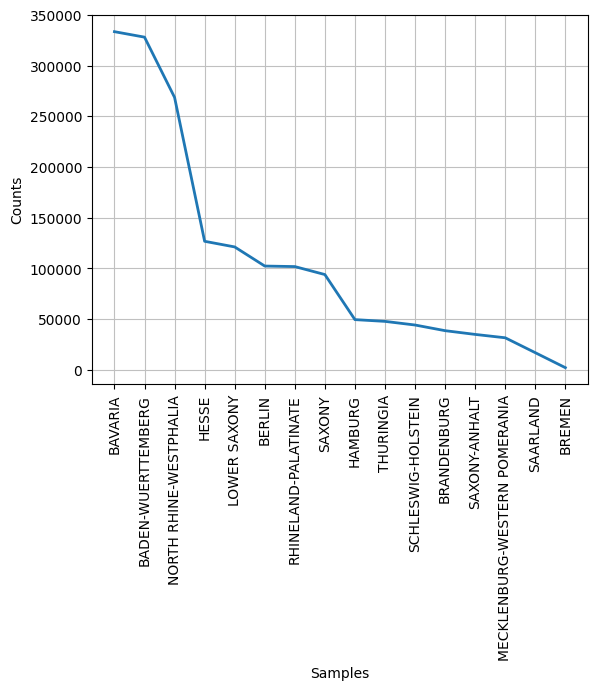

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [61]:
flat_list_vg_state = [item for item in allclaims_df['vg_state']]
fdist_vg_state = FreqDist(flat_list_vg_state)
fdist_vg_state.plot(cumulative=False)

In [ ]:
seg2_and_seg3_claims_df = allclaims_df.query('VERANST_SEGMENT == 4')

In [ ]:
ax = sns.barplot(x="vg_state", y="VG_INKASSO",  data=seg2_and_seg3_claims_df)
#sns.violinplot("vg_state", "VG_INKASSO", data=seg2_and_seg3_claims_df)

plt.ylim(2000, 20000)
plt.xticks(rotation=90)
plt.show()

In [51]:
afds = allclaims_df[allclaims_df['vg_state']=='BREMEN']
print(afds['VG_INKASSO'].max())
print(afds['VG_INKASSO'].min())

fdsfs = afds[afds['VG_INKASSO']==16026.28]
fdsfs

16026.28
8.3


,IMP_ID,GJ,IMPORT,MUFO_REFERENZ_N,BARCODE_NR,VERANST_SEGMENT,REKLA_JN,VG_DATUM_VON,VG_ORT,VG_RAUM,...,BAND,PROMOTER,vg_state,VG_RAUM_clean,VG_RAUM_WO_STOPWORDS,VG_RAUM_KEYWORDS,VG_DATUM_YEAR,VG_DATUM_MONTH,VG_DATUM_DAY_OF_WEEK,VG_DATUM_SEASON
ID,,,,,,,,,,,,,,,,,,,,,
10130967,24643,2016,ABRE U INKA 2016,NaN,6703772318,4,NONRekla,2016-09-02,BREMERHAVEN,BREMERHAVEN,...,UNHEILLIG,STADTHALLE BREMERHAVEN VERANSTALTUNGS- UND MES...,BREMEN,BREMERHAVEN,bremerhaven,[bremerhaven],2016,9,4,4
10776863,26943,2017,ABRE U INKA 2017,NaN,5211131992,4,NONRekla,2016-09-02,BREMERHAVEN,BREMERHAVEN,...,BE ONE,STADTHALLE BREMERHAVEN VERANSTALTUNGS- UND MES...,BREMEN,BREMERHAVEN,bremerhaven,[bremerhaven],2016,9,4,4


## Retreive the states, where event takes place - Featurize vg_state

In [62]:
all_states = [i[0] for i in fdist_vg_state.items()] 
df_featurize_vg_state = pd.DataFrame(allclaims_df['vg_state'])

for term in all_states :
    df_featurize_vg_state['state_'+term]=df_featurize_vg_state['vg_state'].apply(lambda x: 1 if term in x else 0)

display(df_featurize_vg_state.head(10))

,vg_state,state_BAVARIA,state_THURINGIA,state_BADEN-WUERTTEMBERG,state_RHINELAND-PALATINATE,state_BRANDENBURG,state_BERLIN,state_LOWER SAXONY,state_SCHLESWIG-HOLSTEIN,state_HAMBURG,state_HESSE,state_SAARLAND,state_NORTH RHINE-WESTPHALIA,state_SAXONY-ANHALT,state_SAXONY,state_MECKLENBURG-WESTERN POMERANIA,state_BREMEN
ID,,,,,,,,,,,,,,,,,
9938766,BAVARIA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939272,THURINGIA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939279,BAVARIA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939280,BAVARIA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939281,BAVARIA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939282,BAVARIA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939283,BAVARIA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939284,BAVARIA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939289,BAVARIA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Retreive the most common 30 VG_ORT, where event occurs - Featurize VG_ORT

In [ ]:
flat_list_vg_ort = [item for item in allclaims_df['VG_ORT']]
fdist_vg_ort = FreqDist(flat_list_vg_ort)
most_common_terms_vg_ort = [i[0] for i in fdist_vg_ort.most_common(30)] 
df_featurize_vg_ort = pd.DataFrame(allclaims_df['VG_ORT'])

for term in most_common_terms_vg_ort :
    df_featurize_vg_ort['location_'+term]=df_featurize_vg_ort['VG_ORT'].apply(lambda x: 1 if term in x else 0)

display(df_featurize_vg_ort.head(10))

In [ ]:
fdist_vg_ort.plot(30,cumulative=False)

## Featurize TARIF_BEZ


In [63]:
flat_list_tarif_desc = [item for item in allclaims_df['TARIF_BEZ']]
fdist_tarif_desc = FreqDist(flat_list_tarif_desc)
most_common_terms_tarif = [i[0] for i in fdist_tarif_desc.most_common(30)] 
df_featurize_tarif = pd.DataFrame(allclaims_df['TARIF_BEZ'])

for term in most_common_terms_tarif :
    df_featurize_tarif['tarif_'+term]=df_featurize_tarif['TARIF_BEZ'].apply(lambda x: 1 if term in x else 0)

display(df_featurize_tarif.head(10))

,TARIF_BEZ,tarif_U-V II. 1 (+II 2),tarif_U-K (MUSIKER),tarif_U-K (MUSIKER) MINDESTVERGUETUNG,tarif_U-ST I. (MUSIKER),tarif_U-K I (+ II 2B) - MIT SONSTIGEM GELDWERTEN VORTEIL,tarif_U-ST I (MUSIKER) NL,tarif_U-V III. 1,tarif_U-V III. 2,tarif_U-K III. 2D) (MUSIKER) - VOR GELADENEN GAESTEN,tarif_VARIETE I (MUSIKER),tarif_U-V VI. B,tarif_E (MUSIKER),tarif_P-K I. (U-MUSIK),tarif_U-K II. (MUSIKER) BIS 50 MIN,tarif_U-K II. (MUSIKER) BIS 20 MIN,tarif_E-P,tarif_U-K II. (MUSIKER) BIS 25 MIN,tarif_U-K II. (MUSIKER) BIS 15 MIN,tarif_U-K II. (MUSIKER) BIS 30 MIN,tarif_U-K II. (MUSIKER) BIS 10 MIN,tarif_U-ST (MUSIKER),tarif_CHORVERBAND KONZERT U-MUSIK,tarif_VK I 3 ZIRKUSUNTERNEHMEN (MUSIKER),tarif_U-K II. (MUSIKER) BIS 5 MIN,tarif_U-K II. (MUSIKER) BIS 35 MIN,tarif_U-K II. (MUSIKER) BIS 40 MIN,tarif_P-K I. (E-MUSIK),tarif_U-K II (MUSIKER) MINDESTVERGUETUNG,tarif_U-K II. (MUSIKER) BIS 45 MIN,tarif_U-V VI. B MINDESTVERGUETUNG
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9938766,U-K (MUSIKER),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939272,U-V II. 1 (+II 2),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939279,U-V II. 1 (+II 2),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939280,U-V II. 1 (+II 2),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939281,U-V II. 1 (+II 2),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939282,U-K (MUSIKER),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939283,U-V II. 1 (+II 2),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939284,U-V II. 1 (+II 2),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939289,U-V II. 1 (+II 2),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


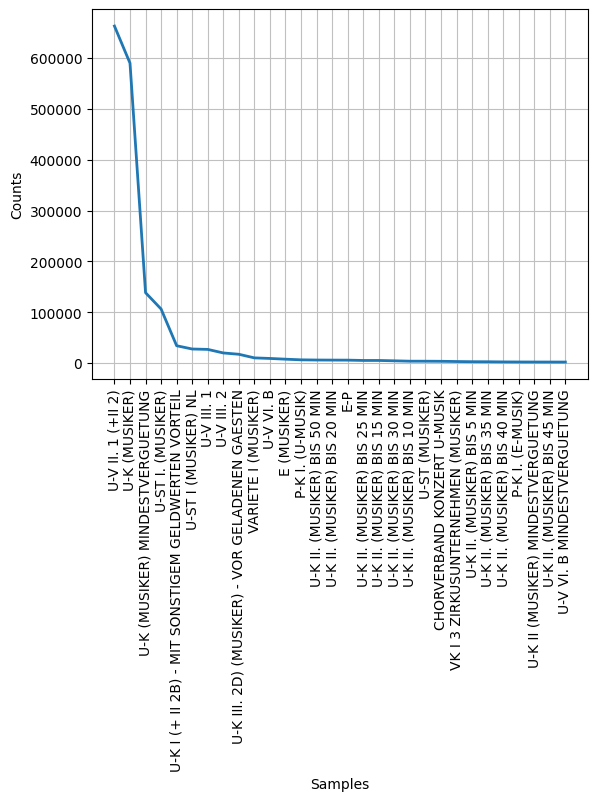

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [64]:
fdist_tarif_desc.plot(30,cumulative=False)

## Featurize Promoter

In [65]:
flat_list_promoter = [item for item in allclaims_df['PROMOTER']]
fdist_promoter = FreqDist(flat_list_promoter)
most_common_terms_promoter = [i[0] for i in fdist_promoter.most_common(30)] 
df_featurize_promoter = pd.DataFrame(allclaims_df['PROMOTER'])


for term in most_common_terms_promoter :
    df_featurize_promoter['promoter_'+term]=df_featurize_promoter['PROMOTER'].apply(lambda x: 1 if term in str(x) else 0)

display(df_featurize_promoter.head(10))

,PROMOTER,promoter_CHORVERBAND NRW E.V. E.V 44135,promoter_LIVE NATION GMBH GMBH 60320,promoter_SCHWAEBISCHER CHORVERBAND E.V. E.V 70372,promoter_TRINITY MUSIC GMBH 10823,promoter_KARSTEN JAHNKE KONZERTDIREKTION GMBH 20359,promoter_FKP SCORPIO KONZERTPRODUKTIONEN GMBH GMBH 22767,promoter_PRIME ENTERTAINMENT GMBH 50672,promoter_LIVE NATION GMBH 60320,promoter_SEMMEL CONCERTS ENTERTAINMENT GMBH 95445,promoter_FKP SCORPIO KONZERTPRODUKTIONEN GMBH 22767,promoter_FRAENKISCHER SAENGERBUND E.V. E.V 96450,promoter_HESSISCHER SAENGERBUND E.V. E.V 61440,promoter_TRINITY MUSIC GMBH GMBH 10823,promoter_EUROPA-PARK GMBH & CO MACK KG 77977,promoter_BADISCHER CHORVERBAND 1862 E.V. E.V 76133,promoter_PRIME ENTERTAINMENT GMBH GMBH 50672,promoter_IRISH PUBS GASTSTAETTEN GMBH 14959,promoter_BACKSTAGE CONCERTS GMBH 80639,promoter_SEMMEL CONCERTS ENTERTAINMENT GMBH GMBH 95445,promoter_PAUL DALY UND PAUL FLEMING GBR 80331,promoter_GASTRO EVENT GMBH 26802,promoter_FRANKFURTER KULTURZENTRUM E.V 60388,promoter_KULTURZENTRUM SCHLACHTHOF WIESBADEN E.V. E.V 65189,promoter_GISBERT HILLER 48317,promoter_KARSTEN JAHNKE KONZERTDIREKTION GMBH GMBH 20359,promoter_BAYERISCHES WIRTSHAUS BERLIN GMBH GMBH 10178,promoter_BERNINGER MUSIK & GASTRONOMIE GMBH 63739,promoter_GRAEFLICHER PARK GMBH & CO. KG GMBH & CO. KG 33014,promoter_THORSTEN WOLF 04109,promoter_CIRCUS RONCALLI GMBH 51063
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9938766,AURACHTALER BLASMUSIKVEREIN WALSDORF E.V 96194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939272,WIPPERDORFER CARNEVAL CLUB E.V 99752,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939279,BAYERISCHE MOTORENWERKE AG 84130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939280,MAENNERCHOR MILBERTSHOFEN-RIESENFELD E.V 81375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939281,MAENNERCHOR MILBERTSHOFEN-RIESENFELD E.V 81375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939282,BILD-WERK FRAUENAU E.V 94258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939283,SPD - ORTSVEREIN KIRCHEHRENBACH 91356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939284,FFW BAD HOEHENSTADT E.V 94081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939289,KATH.PFARRAMT BAD KOHLGRUB K.D.OE.R 82433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


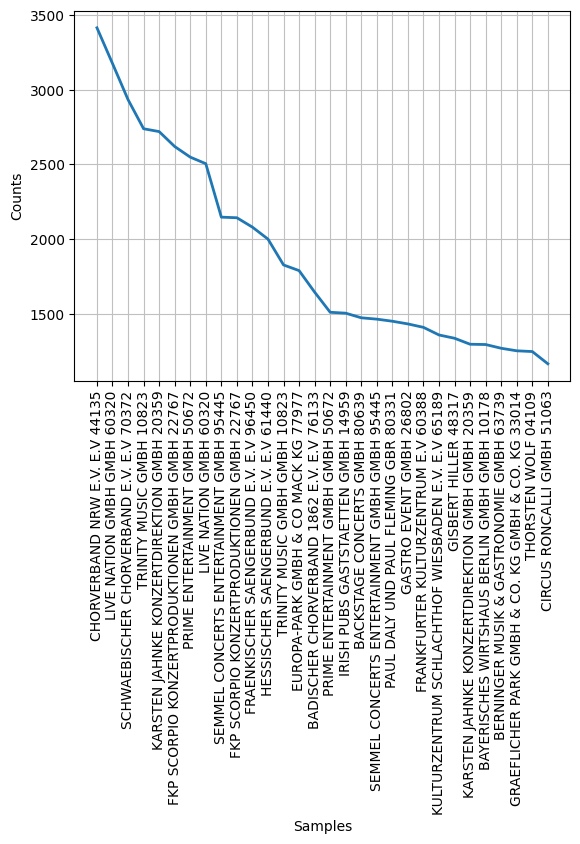

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [66]:
fdist_promoter.plot(30,cumulative=False)

In [ ]:
# google maps API
# how big the city is?
# how close the location to the city centre?

VG_RAUM

In [11]:
nlp = spacy.load('C:/Users/sgopalakrish/Miniconda3/Lib/site-packages/de_core_news_sm/de_core_news_sm-3.4.0/')
nlp_en = spacy.load('C:/Users/sgopalakrish/Miniconda3/Lib/site-packages/en_core_web_sm/en_core_web_sm-3.4.1')

In [22]:
german_stop_words = nlp.Defaults.stop_words
english_stop_words = nlp_en.Defaults.stop_words

In [23]:
def remove_special_chars_from(stopwords):
    cleaned_stop_words = []
    for each in stopwords:
        each = each.replace('ß','SS')
        each = each.upper()
        each = each.replace('Ä', 'AE')
        each = each.replace('Ö', 'OE')
        each = each.replace('Ü', 'UE')
        
        cleaned_stop_words.append(each)
    return cleaned_stop_words

In [24]:
cleaned_de_stopwords = remove_special_chars_from(german_stop_words)

additional_stopwords = [
    'ST', 'FREIEN', 'BAD', 'HAUS', 'EV', 'BERLIN', 'KATH', 'S', 'HOF', 'ALTE', 'MITTE', 'LUTH', 'MUENCHEN',
    'IRISH', 'MUSIK', 'KULTUR', 'FUER', 'EVANG', 'MARITIM', 'KOELN', 'U', 'TURN', 'E', 'STUTTGART', 'ALTES',
    'A', 'GASTES', 'THE', 'EUROPA', 'HANNOVER', 'STADT', 'BADEN', 'NUERNBERG', 'HAMBURG', 'NEUE',
    'EVANGELISCHE', 'LEIPZIG', 'B', 'DRESDEN', 'BREMEN', 'PETER', '1','ALTER', 'AM', 'DIE', 'DER',
    'DAS', 'DES', 'DEN', 'DEM', 'EIN', 'EINER', 'EINEM', 'EINES', 'EINE',
    'MEIN', 'MEINER', 'MEINES', 'MEINEM', 'MEINE', 'UND'
]


In [25]:
all_stopwords = cleaned_de_stopwords + additional_stopwords + list(english_stop_words)
all_stopwords = list(map(lambda x: x.lower(), all_stopwords))

In [69]:
# Find all the categories of VG_RAUM
allclaims_df['VG_RAUM_clean']=allclaims_df['VG_RAUM'].astype(str).fillna('').map(lambda x: re.sub(r'\W+', ' ', x))

In [70]:
room_list_wo_stopwords = []
for each_room in allclaims_df['VG_RAUM_clean'].tolist():
    for each_stopword in all_stopwords:
        # Remove stopword from each row in VG_RAUM_clean 
        each_room.replace(each_stopword,'')
        
    if 'KIRCHE' in each_room:
        room_list_wo_stopwords.append('KIRCHE')
    else:
        room_list_wo_stopwords.append(each_room)

In [71]:
room_list_wo_stopwords = [x.lower() for x in room_list_wo_stopwords]

In [72]:
allclaims_df['VG_RAUM_WO_STOPWORDS'] = room_list_wo_stopwords

In [ ]:
# Stemming - removes suffixes and prefixes from word roots, 
# Lemmatization - maps the remaining root forms (which may not always be proper words) back to an actual word that occurs in natural language.

Get keywords using spacy

In [73]:
def get_keywords(text):
    result = []
    pos_tag = ['PROPN', 'NOUN', 'VERB']
    for token in text:
        if(token.text in all_stopwords or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text) 
    return result

In [74]:
raum_cleaned_df = (row.VG_RAUM_WO_STOPWORDS for row in allclaims_df.itertuples())

vg_raum_keywords = []
for each_object in nlp.pipe(raum_cleaned_df):
  vg_raum_keywords.append(get_keywords(each_object))

In [75]:
allclaims_df['VG_RAUM_KEYWORDS'] = vg_raum_keywords

## Featurize VG_RAUM

In [76]:
flat_list_vg_raum_keywords = [item for sublist in allclaims_df['VG_RAUM_KEYWORDS'] for item in sublist]
fdist_vg_raum_keywords = FreqDist(flat_list_vg_raum_keywords)
most_common_terms_vg_raum = [i[0] for i in fdist_vg_raum_keywords.most_common(30)] 
df_featurize_vg_raum_keywords = pd.DataFrame(allclaims_df['VG_RAUM_KEYWORDS'])

for term in most_common_terms_vg_raum :
    df_featurize_vg_raum_keywords['place_'+term]=df_featurize_vg_raum_keywords['VG_RAUM_KEYWORDS'].apply(lambda x: 1 if term in x else 0)

display(df_featurize_vg_raum_keywords.head(10))

,VG_RAUM_KEYWORDS,place_kirche,place_hotel,place_cafe,place_theater,place_club,place_halle,place_gaststaette,place_festhalle,place_kulturzentrum,place_festzelt,place_schloss,place_pub,place_stadthalle,place_park,place_gasthof,place_kabarett,place_arena,place_schlachthof,place_wandelhalle,place_turnhalle,place_buergerhaus,place_museum,place_rathaus,place_staatsbad,place_zelt,place_jazz,place_forum,place_gymnasium,place_schule,place_sporthalle
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9938766,"[turnhalle, sv, rw, lisberg]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9939272,"[grundschule, wipperdorf]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939279,"[bmw, werk, dingolfing]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939280,[milbertshofen],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939281,[milbertshofen],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939282,"[gaststaette, gistl]",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939283,[schuetzenheim],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939284,"[gaststaette, lustinger]",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939289,[martin],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


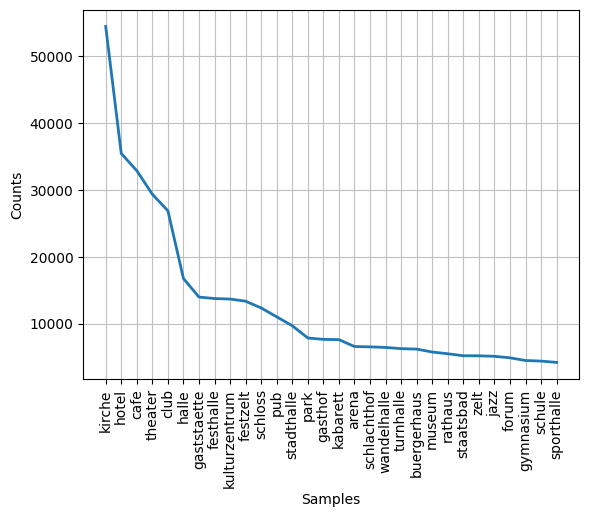

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [77]:
fdist_vg_raum_keywords.plot(30,cumulative=False)

## Featurize BAND

In [67]:
flat_list_band = [item for item in allclaims_df['BAND']]
fdist_band_desc = FreqDist(flat_list_band)
most_common_terms_band = [i[0] for i in fdist_band_desc.most_common(30)] 
df_featurize_band = pd.DataFrame(allclaims_df['BAND'])

for term in most_common_terms_band :
    df_featurize_band['band_'+term]=df_featurize_band['BAND'].apply(lambda x: 1 if term in x else 0)

display(df_featurize_band.head(10))

,BAND,band_KURORCHESTER BAD WIL,band_MUSIKVEREIN HARMONIE,band_KASALLA,band_CAT BALLOU,band_RONCALLI ROYAL ORCH,band_JUGENDBLASORCHESTER,band_KURORCHESTER BAD PYR,band_HOEHNER,band_PAVEIER,band_DOMSTUERMER,band_KLUENGELKOEPP,band_ALLEINUNTERHALTER,band_THE GREGORIAN VOICES,band_BRINGS,band_MUSICA HUNGARICA,band_CONCERTO,band_BAD SALZUFLEN ORCHES,band_MUSIKVEREIN STADTKAP,band_SALONORCHESTER HUNGA,band_MILJOE,band_RAEUBER,band_KABARETT LEIPZIGER F,band_MARITA KOELLNER,band_SALON-ORCHESTER HUNG,band_BLAECK FOEOESS,band_SCHUELERINNEN UND SC,band_ROMAIN VICENTE,band_STAATLICHE KURKAPELL,band_MUSIKZUG DER FREIWIL,band_FUNKY MARYS
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9938766,DAS BOEHMISCHE FEUER,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939272,KYFFHAEUSER TANZ BAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939279,BERUFSFACHSCHULE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939280,SIEBENBUERGER BLASMU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939281,SIEBENBUERGER BLASMU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939282,ZEPP-IN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939283,OVERCROWDED ELEVATOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939284,LMA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939289,ALPENBAZIS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


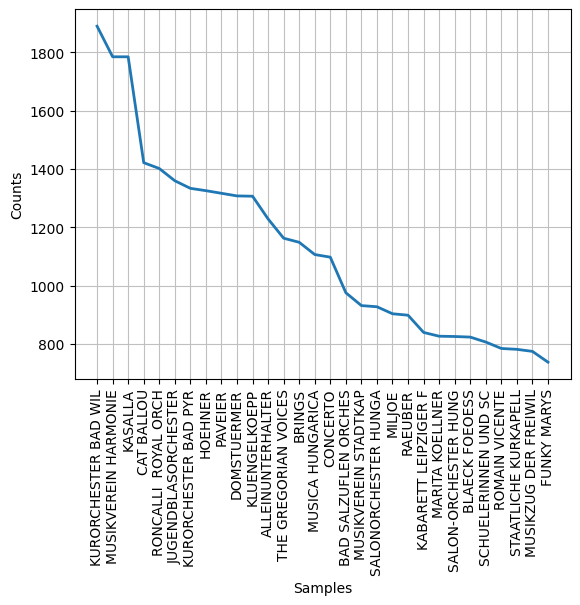

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [68]:
fdist_band_desc.plot(30,cumulative=False)

VERANST_SEGMENT

In [43]:
# Convert the VERANST_SEGMENT values from float to Int
allclaims_df.VERANST_SEGMENT = allclaims_df['VERANST_SEGMENT'].astype(int)

VG_DATUM

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
le = LabelEncoder()

allclaims_df['VG_DATUM_YEAR'] = le.fit_transform(allclaims_df['VG_DATUM_VON'].dt.year)
allclaims_df['VG_DATUM_MONTH'] = le.fit_transform(allclaims_df['VG_DATUM_VON'].dt.month)
allclaims_df['VG_DATUM_DAY_OF_WEEK']= le.fit_transform(allclaims_df['VG_DATUM_VON'].dt.dayofweek)

seasons = [0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 0]
claim_season_list = [seasons[item] for item in allclaims_df['VG_DATUM_MONTH']]

allclaims_df['VG_DATUM_SEASON'] = claim_season_list

In [ ]:
tarif_U-V II. 1 (+II 2)
tarif_U-K (MUSIKER)
tarif_U-K (MUSIKER) MINDESTVERGUETUNG
tarif_U-ST I. (MUSIKER)
tarif_E-P
tarif_U-K I (+ II 2B) - MIT SONSTIGEM GELDWERTEN VORTEIL
tarif_U-V III. 1
tarif_U-ST I (MUSIKER) NL
tarif_U-V III. 2
tarif_E (MUSIKER)
tarif_U-K III. 2D) (MUSIKER) - VOR GELADENEN GAESTEN
tarif_P-K I. (U-MUSIK)
tarif_CHORVERBAND KONZERT U-MUSIK
tarif_U-V VI. B
tarif_VARIETE I (MUSIKER)
tarif_U-K II. (MUSIKER) BIS 20 MIN
tarif_U-K II. (MUSIKER) BIS 25 MIN
tarif_U-K II. (MUSIKER) BIS 15 MIN
tarif_U-K II. (MUSIKER) BIS 50 MIN
tarif_U-K II. (MUSIKER) BIS 30 MIN
tarif_U-K II. (MUSIKER) BIS 10 MIN
tarif_VK I 3 ZIRKUSUNTERNEHMEN (MUSIKER)
tarif_P-K I. (E-MUSIK)
tarif_U-ST (MUSIKER)
tarif_U-K II. (MUSIKER) BIS 5 MIN
tarif_U-K II. (MUSIKER) BIS 35 MIN
tarif_U-K II. (MUSIKER) BIS 40 MIN
tarif_U-V-KS (MUSIKER)
tarif_U-K II (MUSIKER) MINDESTVERGUETUNG
tarif_U-K II. (MUSIKER) BIS 45 MIN

place_kirche	
place_hotel
place_theater	
place_cafe	
place_club	
place_halle	
place_schloss	
place_gaststaette	
place_festhalle	
place_festzelt	
place_kulturzentrum	
place_musikschule	
place_stadthalle	
place_pub	
place_gasthof	
place_park	
place_buergerhaus	
place_gymnasium	
place_kabarett	
place_turnhalle	
place_rathaus	
place_schule	
place_museum	
place_arena	
place_schlachthof	
place_kurhaus	
place_zelt	
place_grundschule	
place_forum	place_wandelhalle

# place_KIRCHE
# place_HOTEL
# place_STADTHALLE
# place_CLUB
# place_BUERGERHAUS
# place_THEATER
# place_HALLE
# place_FESTHALLE
# place_KURHAUS
# place_SCHLOSS
# place_CAFE
# place_KULTURZENTRUM
# place_FESTZELT
# place_MUSIKSCHULE
# place_MEHRZWECKHALLE
# place_PUB
# place_BAR
# place_TURNHALLE
# place_GASTHAUS
# place_GYMNASIUM
# place_RATHAUS
# place_PARK
# place_GASTHOF
# place_KABARETT
# place_SCHUETZENHALLE
# place_GEMEINDEHALLE
# place_GASTSTAETTE
# place_SCHULE
# place_MUSEUM
# place_VEREINSHEIM

location_BERLIN
location_MUENCHEN
location_HAMBURG
location_KOELN
location_STUTTGART
location_LEIPZIG
location_FRANKFURT AM MAIN
location_DRESDEN
location_HANNOVER
location_NUERNBERG
location_DUESSELDORF
location_BREMEN
location_KARLSRUHE
location_DORTMUND
location_ESSEN
location_AUGSBURG
location_MANNHEIM
location_MUENSTER
location_BONN
location_WIESBADEN
location_ERFURT
location_KIEL
location_REGENSBURG
location_FREIBURG IM BREISGAU
location_CHEMNITZ
location_MAINZ
location_WUERZBURG
location_MAGDEBURG
location_POTSDAM
location_BIELEFELD

state_BAVARIA
state_RHINELAND-PALATINATE
state_BADEN-WUERTTEMBERG	
state_NORTH RHINE-WESTPHALIA	
state_THURINGIA	
state_HESSE	
state_BRANDENBURG	
state_SCHLESWIG-HOLSTEIN	
state_BERLIN	
state_MECKLENBURG-WESTERN POMERANIA	
state_LOWER SAXONY	
state_HAMBURG	
state_SAARLAND	
state_SAXONY-ANHALT	
state_SAXONY	
state_BREMEN

'promoter_CHORVERBAND NRW E.V. E.V 44135', 
'promoter_LIVE NATION GMBH GMBH 60320', 
'promoter_SCHWAEBISCHER CHORVERBAND E.V. E.V 70372', 
'promoter_TRINITY MUSIC GMBH 10823', 
'promoter_KARSTEN JAHNKE KONZERTDIREKTION GMBH 20359', 
'promoter_FKP SCORPIO KONZERTPRODUKTIONEN GMBH GMBH 22767', 
'promoter_PRIME ENTERTAINMENT GMBH 50672', 
'promoter_LIVE NATION GMBH 60320', 
'promoter_FRAENKISCHER SAENGERBUND E.V. E.V 96450', 
'promoter_SEMMEL CONCERTS ENTERTAINMENT GMBH 95445', 
'promoter_FKP SCORPIO KONZERTPRODUKTIONEN GMBH 22767', 
'promoter_HESSISCHER SAENGERBUND E.V. E.V 61440', 
'promoter_TRINITY MUSIC GMBH GMBH 10823', 
'promoter_EUROPA-PARK GMBH & CO MACK KG 77977', 
'promoter_BADISCHER CHORVERBAND 1862 E.V. E.V 76133', 
'promoter_PRIME ENTERTAINMENT GMBH GMBH 50672', 
'promoter_IRISH PUBS GASTSTAETTEN GMBH 14959', 
'promoter_GASTRO EVENT GMBH 26802', 
'promoter_SEMMEL CONCERTS ENTERTAINMENT GMBH GMBH 95445', 
'promoter_BACKSTAGE CONCERTS GMBH 80639', 
'promoter_PAUL DALY UND PAUL FLEMING GBR 80331', 
'promoter_FRANKFURTER KULTURZENTRUM E.V 60388', 
'promoter_GISBERT HILLER 48317', 
'promoter_KULTURZENTRUM SCHLACHTHOF WIESBADEN E.V. E.V 65189', 
'promoter_KARSTEN JAHNKE KONZERTDIREKTION GMBH GMBH 20359', 
'promoter_BAYERISCHES WIRTSHAUS BERLIN GMBH GMBH 10178', 
'promoter_BERNINGER MUSIK & GASTRONOMIE GMBH 63739', 
'promoter_GRAEFLICHER PARK GMBH & CO. KG GMBH & CO. KG 33014', 
'promoter_THORSTEN WOLF 04109', 
'promoter_CIRCUS RONCALLI GMBH 51063'

Merge all the features

In [92]:
allclaims_feature_df = allclaims_df.merge(df_featurize_vg_raum_keywords, how='left', on='ID')
allclaims_feature_df = allclaims_feature_df.merge(df_featurize_tarif, how='left', on='ID')
# allclaims_feature_df = allclaims_feature_df.merge(df_featurize_vg_ort, how='left', on='ID')
allclaims_feature_df = allclaims_feature_df.merge(df_featurize_vg_state, how='left', on='ID')
allclaims_feature_df = allclaims_feature_df.merge(df_featurize_band, how='left', on='ID')
allclaims_feature_df = allclaims_feature_df.merge(df_featurize_promoter, how='left', on='ID')

In [93]:
allclaims_feature_df=allclaims_feature_df.rename(str.lower, axis='columns')

In [ ]:
#allclaims_feature_df.to_pickle('./data/export_features_2016_2020_v1.pkl.bz2', protocol=4)

In [97]:
# ArrowTypeError: ("Expected bytes, got a 'float' object", 'Conversion failed for column nutzliznehm_plz with type object')
allclaims_feature_df = allclaims_feature_df.drop('nutzliznehm_plz', axis=1)

In [50]:
# allclaims_feature_df.to_parquet('./data/export_features_2016_2020_v2.parquet.gzip',compression='gzip')

In [99]:
allclaims_feature_df.to_parquet('./data/export_features_2016_2020_v3.parquet.gzip',compression='gzip')

In [ ]:
# Feautes used - 'VG_RAUM_KEYWORDS', 'VG_DATUM_VON', 'VG_ORT', 'TARIF_BEZ'
features = ['tarif_u-v ii. 1 (+ii 2)', 'tarif_u-k (musiker)', 
'tarif_u-k (musiker) mindestverguetung','tarif_u-st i. (musiker)', 
'tarif_e-p', 'tarif_u-k i (+ ii 2b) - mit sonstigem geldwerten vorteil', 
'tarif_u-v iii. 1', 'tarif_u-st i (musiker) nl', 'tarif_u-v iii. 2', 
'tarif_e (musiker)', 'tarif_u-k iii. 2d) (musiker) - vor geladenen gaesten', 
'tarif_p-k i. (u-musik)', 'tarif_chorverband konzert u-musik', 
'tarif_u-v vi. b','tarif_variete i (musiker)',
'tarif_u-k ii. (musiker) bis 20 min','tarif_u-k ii. (musiker) bis 25 min',
'tarif_u-k ii. (musiker) bis 15 min','tarif_u-k ii. (musiker) bis 50 min',
'tarif_u-k ii. (musiker) bis 30 min','tarif_u-k ii. (musiker) bis 10 min',
'tarif_vk i 3 zirkusunternehmen (musiker)','tarif_p-k i. (e-musik)',
'tarif_u-st (musiker)','tarif_u-k ii. (musiker) bis 5 min',
'tarif_u-k ii. (musiker) bis 35 min','tarif_u-k ii. (musiker) bis 40 min',
'tarif_u-v-ks (musiker)','tarif_u-k ii (musiker) mindestverguetung',
'tarif_u-k ii. (musiker) bis 45 min',

'place_kirche','place_hotel','place_stadthalle','place_club',
'place_buergerhaus','place_theater','place_halle','place_festhalle',
'place_kurhaus','place_schloss','place_cafe','place_kulturzentrum',
'place_festzelt','place_musikschule','place_mehrzweckhalle','place_pub',
'place_bar','place_turnhalle','place_gasthaus','place_gymnasium',
'place_rathaus','place_park','place_gasthof','place_kabarett',
'place_schuetzenhalle','place_gemeindehalle','place_gaststaette',
'place_schule','place_museum','place_vereinsheim',

# 'location_berlin','location_muenchen','location_hamburg','location_koeln',
# 'location_stuttgart','location_leipzig','location_frankfurt am main',
# 'location_dresden','location_hannover','location_nuernberg','location_duesseldorf',
# 'location_bremen','location_karlsruhe','location_dortmund','location_essen',
# 'location_augsburg','location_mannheim','location_muenster','location_bonn',
# 'location_wiesbaden','location_erfurt','location_kiel','location_regensburg',
# 'location_freiburg im breisgau','location_chemnitz','location_mainz',
# 'location_wuerzburg','location_magdeburg','location_potsdam',
# 'location_bielefeld',

'state_bavaria','state_rhineland-palatinate',
'state_baden-wuerttemberg',	'state_north rhine-westphalia',	
'state_thuringia','state_hesse',	
'state_brandenburg', 'state_schleswig-holstein',	
'state_berlin',	'state_mecklenburg-western pomerania',	
'state_lower saxony', 'state_hamburg',	
'state_saarland', 'state_saxony-anhalt',	
'state_saxony',	'state_bremen',

'vg_datum_year','vg_datum_month','vg_datum_day_of_week','vg_datum_season'
]

In [ ]:
# Feautes used - 'VG_RAUM_KEYWORDS', 'VG_DATUM_VON', 'vg_state', 'BAND'
features_v1 = ['place_kirche', 'place_hotel', 'place_cafe',
 'place_theater', 'place_club', 'place_halle',
 'place_gaststaette', 'place_festhalle', 'place_kulturzentrum',
 'place_festzelt', 'place_schloss', 'place_pub',
 'place_stadthalle', 'place_park', 'place_gasthof',
 'place_kabarett', 'place_arena', 'place_schlachthof',
 'place_wandelhalle', 'place_turnhalle', 'place_buergerhaus',
 'place_museum', 'place_rathaus', 'place_staatsbad',
 'place_zelt', 'place_jazz', 'place_forum',
 'place_gymnasium', 'place_schule', 'place_sporthalle', 

'band_kurorchester bad wil', 'band_musikverein harmonie', 'band_kasalla',
 'band_cat ballou', 'band_roncalli  royal orch', 'band_jugendblasorchester',
 'band_kurorchester bad pyr', 'band_hoehner', 'band_paveier',
 'band_domstuermer', 'band_kluengelkoepp', 'band_alleinunterhalter',
 'band_the gregorian voices', 'band_brings', 'band_musica hungarica',
 'band_concerto', 'band_bad salzuflen orches', 'band_musikverein stadtkap',
 'band_salonorchester hunga', 'band_miljoe', 'band_raeuber',
 'band_kabarett leipziger f', 'band_marita koellner', 'band_salon-orchester hung',
 'band_blaeck foeoess', 'band_schuelerinnen und sc', 'band_romain vicente',
 'band_staatliche kurkapell', 'band_musikzug der freiwil', 'band_funky marys',

'state_bavaria','state_rhineland-palatinate',
'state_baden-wuerttemberg',	'state_north rhine-westphalia',	
'state_thuringia','state_hesse',	
'state_brandenburg', 'state_schleswig-holstein',	
'state_berlin',	'state_mecklenburg-western pomerania',	
'state_lower saxony', 'state_hamburg',	
'state_saarland', 'state_saxony-anhalt',	
'state_saxony',	'state_bremen',

'vg_datum_year','vg_datum_month','vg_datum_day_of_week','vg_datum_season']

In [ ]:
# Feautes used - 'VG_RAUM_KEYWORDS', 'VG_DATUM_VON', 'vg_state', 'BAND', 'PROMOTER'
features_v2 = ['place_kirche', 'place_hotel', 'place_cafe',
 'place_theater', 'place_club', 'place_halle',
 'place_gaststaette', 'place_festhalle', 'place_kulturzentrum',
 'place_festzelt', 'place_schloss', 'place_pub',
 'place_stadthalle', 'place_park', 'place_gasthof',
 'place_kabarett', 'place_arena', 'place_schlachthof',
 'place_wandelhalle', 'place_turnhalle', 'place_buergerhaus',
 'place_museum', 'place_rathaus', 'place_staatsbad',
 'place_zelt', 'place_jazz', 'place_forum',
 'place_gymnasium', 'place_schule', 'place_sporthalle',

'band_kurorchester bad wil', 'band_musikverein harmonie', 'band_kasalla',
 'band_cat ballou', 'band_roncalli  royal orch', 'band_jugendblasorchester',
 'band_kurorchester bad pyr', 'band_hoehner', 'band_paveier',
 'band_domstuermer', 'band_kluengelkoepp', 'band_alleinunterhalter',
 'band_the gregorian voices', 'band_brings', 'band_musica hungarica',
 'band_concerto', 'band_bad salzuflen orches', 'band_musikverein stadtkap',
 'band_salonorchester hunga', 'band_miljoe', 'band_raeuber',
 'band_kabarett leipziger f', 'band_marita koellner', 'band_salon-orchester hung',
 'band_blaeck foeoess', 'band_schuelerinnen und sc', 'band_romain vicente',
 'band_staatliche kurkapell', 'band_musikzug der freiwil', 'band_funky marys',


'state_bavaria','state_rhineland-palatinate',
'state_baden-wuerttemberg',	'state_north rhine-westphalia',	
'state_thuringia','state_hesse',	
'state_brandenburg', 'state_schleswig-holstein',	
'state_berlin',	'state_mecklenburg-western pomerania',	
'state_lower saxony', 'state_hamburg',	
'state_saarland', 'state_saxony-anhalt',	
'state_saxony',	'state_bremen',

'vg_datum_year','vg_datum_month','vg_datum_day_of_week','vg_datum_season']

In [ ]:
# Feautes used - 'VG_RAUM_KEYWORDS', 'VG_DATUM_VON', 'vg_state', 'BAND', 'PROMOTER', TARIF_BEZ
features_v3 = ['place_kirche', 'place_hotel', 'place_cafe',
 'place_theater', 'place_club', 'place_halle',
 'place_gaststaette', 'place_festhalle', 'place_kulturzentrum',
 'place_festzelt', 'place_schloss', 'place_pub',
 'place_stadthalle', 'place_park', 'place_gasthof',
 'place_kabarett', 'place_arena', 'place_schlachthof',
 'place_wandelhalle', 'place_turnhalle', 'place_buergerhaus',
 'place_museum', 'place_rathaus', 'place_staatsbad',
 'place_zelt', 'place_jazz', 'place_forum',
 'place_gymnasium', 'place_schule', 'place_sporthalle',

'tarif_u-v ii. 1 (+ii 2)', 'tarif_u-k (musiker)', 'tarif_u-k (musiker) mindestverguetung', 
'tarif_u-k i (+ ii 2b) - mit sonstigem geldwerten vorteil', 'tarif_u-st i (musiker) nl', 'tarif_u-v iii. 1', 
'tarif_u-v iii. 2', 'tarif_u-k iii. 2d) (musiker) - vor geladenen gaesten', 'tarif_variete i (musiker)', 
'tarif_u-v vi. b', 'tarif_e (musiker)', 'tarif_p-k i. (u-musik)', 
'tarif_u-k ii. (musiker) bis 50 min', 'tarif_u-k ii. (musiker) bis 20 min', 'tarif_e-p', 
'tarif_u-k ii. (musiker) bis 15 min', 'tarif_u-k ii. (musiker) bis 25 min', 'tarif_u-k ii. (musiker) bis 30 min', 
'tarif_u-st (musiker)', 'tarif_u-k ii. (musiker) bis 10 min', 'tarif_chorverband konzert u-musik',
'tarif_vk i 3 zirkusunternehmen (musiker)', 'tarif_u-k ii. (musiker) bis 5 min', 'tarif_u-k ii. (musiker) bis 35 min', 
'tarif_u-k ii. (musiker) bis 40 min', 'tarif_p-k i. (e-musik)', 'tarif_u-st i. (musiker)', 
'tarif_u-k ii (musiker) mindestverguetung', 'tarif_u-k ii. (musiker) bis 45 min', 'tarif_u-v vi. b mindestverguetung', 


'band_kurorchester bad wil', 'band_musikverein harmonie', 'band_kasalla',
 'band_cat ballou', 'band_roncalli  royal orch', 'band_jugendblasorchester',
 'band_kurorchester bad pyr', 'band_hoehner', 'band_paveier',
 'band_domstuermer', 'band_kluengelkoepp', 'band_alleinunterhalter',
 'band_the gregorian voices', 'band_brings', 'band_musica hungarica',
 'band_concerto', 'band_bad salzuflen orches', 'band_musikverein stadtkap',
 'band_salonorchester hunga', 'band_miljoe', 'band_raeuber',
 'band_kabarett leipziger f', 'band_marita koellner', 'band_salon-orchester hung',
 'band_blaeck foeoess', 'band_schuelerinnen und sc', 'band_romain vicente',
 'band_staatliche kurkapell', 'band_musikzug der freiwil', 'band_funky marys',


'state_bavaria','state_rhineland-palatinate',
'state_baden-wuerttemberg',	'state_north rhine-westphalia',	
'state_thuringia','state_hesse',	
'state_brandenburg', 'state_schleswig-holstein',	
'state_berlin',	'state_mecklenburg-western pomerania',	
'state_lower saxony', 'state_hamburg',	
'state_saarland', 'state_saxony-anhalt',	
'state_saxony',	'state_bremen',

'vg_datum_year','vg_datum_month','vg_datum_day_of_week','vg_datum_season',

'promoter_chorverband nrw e.v. e.v 44135', 
'promoter_live nation gmbh gmbh 60320', 
'promoter_schwaebischer chorverband e.v. e.v 70372',
'promoter_trinity music gmbh 10823',
'promoter_karsten jahnke konzertdirektion gmbh 20359',
'promoter_fkp scorpio konzertproduktionen gmbh gmbh 22767',
'promoter_prime entertainment gmbh 50672',
'promoter_live nation gmbh 60320',
'promoter_fraenkischer saengerbund e.v. e.v 96450',
'promoter_semmel concerts entertainment gmbh 95445',
'promoter_fkp scorpio konzertproduktionen gmbh 22767',
'promoter_hessischer saengerbund e.v. e.v 61440',
'promoter_trinity music gmbh gmbh 10823',
'promoter_europa-park gmbh & co mack kg 77977',
'promoter_badischer chorverband 1862 e.v. e.v 76133',
'promoter_prime entertainment gmbh gmbh 50672',
'promoter_irish pubs gaststaetten gmbh 14959',
'promoter_gastro event gmbh 26802',
'promoter_semmel concerts entertainment gmbh gmbh 95445',
'promoter_backstage concerts gmbh 80639',
'promoter_paul daly und paul fleming gbr 80331',
'promoter_frankfurter kulturzentrum e.v 60388',
'promoter_gisbert hiller 48317',
'promoter_kulturzentrum schlachthof wiesbaden e.v. e.v 65189',
'promoter_karsten jahnke konzertdirektion gmbh gmbh 20359',
'promoter_bayerisches wirtshaus berlin gmbh gmbh 10178',
'promoter_berninger musik & gastronomie gmbh 63739',
'promoter_graeflicher park gmbh & co. kg gmbh & co. kg 33014',
'promoter_thorsten wolf 04109',
'promoter_circus roncalli gmbh 51063']

Baseline Classifier models to classify event segments

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
X = allclaims_feature_df[features]
y = allclaims_feature_df['veranst_segment']

In [ ]:
print(allclaims_df['VG_RAUM_KEYWORDS'].dtypes)
print(allclaims_df['VG_DATUM_VON'].dtypes)
print(allclaims_df['VG_ORT'].dtypes)
print(allclaims_df['TARIF_BEZ'].dtypes)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

XGBoost Classifier

In [ ]:
pip install xgboost

In [ ]:
import xgboost

xgboost_classifier = xgboost.XGBClassifier()
xgboost_classifier.fit(X_train, y_train)

In [ ]:
# save the model to disk
xbg_filename = 'xgb_classifier_model.sav'
pickle.dump(xgboost_classifier, open(xbg_filename, 'wb'))

In [ ]:
y_pred = xgboost_classifier.predict(X_test)

Evaluation

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

xgboost_accuracy = accuracy_score(y_test, y_pred, normalize=False)
print(xgboost_accuracy)

SVC Classifier

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

In [ ]:
# save the model to disk
filename = 'svc_classifier_model.sav'
pickle.dump(svclassifier, open(filename, 'wb'))

In [ ]:
y_pred = svclassifier.predict(X_test)

Evaluation

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

svc_accuracy = accuracy_score(y_test, y_pred, normalize=False)
print(svc_accuracy)

In [ ]:
# Group the places by the state
# Find the missing places using the PLZ or using the VG_Raum

In [ ]:
# There are only 2 values in the INKASSO_NETTO and INKASSO_BRUTTO
# There are no null values in VG_INKASSO
# Lowest value of VG_INKASSO is 0.04 and highest value is 409.7
# How could segment 2 (0 - 50 euros) and segment 3 (50-100 euros) would have high VG_INKASSO values?
